# Assignment 2: Naive Bayes and Text Classification

Only use the already imported library `numpy`. Make sure that the `spamham.txt` dataset is in the same directory as the notebook.

List your team members (name and immatriculation number) in the following cell:

Jonas Lammert 3149269

Alexander Tiessen 2965198

Patrick Schneefuss 2951267

In [124]:
# Load required packages and dataset. Do not modify.
import numpy as np


def load_spamham_dataset():
    import string
    
    with open('spamham.txt', mode='r', encoding='utf-8') as f:
        rows = [l.strip().split('\t')[:2] for l in f]
    
    y, X = zip(*rows)
    X =[x.translate(str.maketrans('', '', string.punctuation)).lower().split() for x in X]
    
    return X, y
    

X, y = load_spamham_dataset()

print('Sample:')
print(f'{y[0]}: {X[0]}')
print(f'{y[2]}: {X[2]}')

Sample:
ham: ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
spam: ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']


## Task 2: Spam Classification with Naive Bayes

Check out the description of the dataset at [https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

Implement a Naive Bayes classifier with Laplace smoothing to detect whether a text message is spam or ham (not spam).

A text message is represented by a list of string tokens as shown above.
The classification target is binary and the two possible labels are the strings `'spam'` and `'ham'`.

Fill out the methods in `NaiveBayesSpamClassifier` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed.

Hint: Try to map the text messages to word frequency vectors by counting how often each word occurs in a message.

In [125]:
# Implement your solution here.
class NaiveBayesSpamClassifier(object):
    def __init__(self):
        self.spam_dict = {"total_count": 0}
        self.ham_dict = {"total_count": 0}
        self.spam_docs = 0
        self.ham_docs = 0
        
    
    def fit(self, X, y):
        # Go over each message an its corresponding label
        for message, label in zip(X, y):
            for token in message:               
                    if label == "spam":
                        self.spam_dict[token] = 1 if (token not in self.spam_dict.keys()) else (self.spam_dict[token] + 1)
                        self.spam_dict["total_count"] +=1
                    if label == "ham":
                        self.ham_dict[token] = 1 if (token not in self.ham_dict.keys()) else (self.ham_dict[token] + 1)
                        self.ham_dict["total_count"] += 1

            if label == "spam":
                self.spam_docs += 1
            else:
                self.ham_docs += 1

        for token in self.spam_dict.keys():
            if token != "total_count":
                self.spam_dict[token] = (self.spam_dict[token] + 1) / (self.spam_dict["total_count"] + len(self.spam_dict.keys()) -1)

        for token in self.ham_dict.keys():
            if token != "total_count":
                self.ham_dict[token] = (self.ham_dict[token] + 1) / (self.ham_dict["total_count"] + len(self.ham_dict.keys()) -1)                      

    
    def predict(self, X):

        y_pred = []        
        for message in X:                      
            spam_probability = self.spam_docs / (self.spam_docs + self.ham_docs)
            ham_probability =  self.ham_docs / (self.spam_docs + self.ham_docs)
                       
            for token in message:
                    if token in self.spam_dict.keys():
                        spam_probability = spam_probability * self.spam_dict[token]
                    # if this term had not occured in category spam
                    else :
                        spam_probability = spam_probability * (1 / (self.spam_dict["total_count"] + len(self.spam_dict.keys()) - 1))
                    # if this term had not occured in category ham
                    if token in self.ham_dict.keys():
                        ham_probability = ham_probability * self.ham_dict[token]
                    else :
                        ham_probability = ham_probability * (1 / (self.ham_dict["total_count"] + len(self.ham_dict.keys()) -1 ))

            y_pred.append('ham') if np.argmax(np.asarray([spam_probability, ham_probability])) == 1 else y_pred.append('spam')           
       
        return y_pred


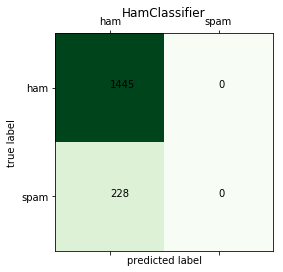

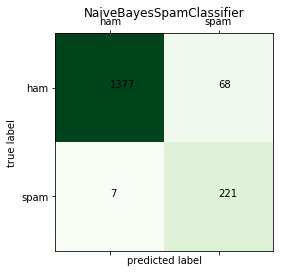

In [126]:
# The following code will evaluate your classifier.
class HamClassifier(object):
    """
    This classifier is a primitive baseline, which just predicts the most common class each time.
    Naive Bayes should definitely beat this.
    """
    def fit(self, X, y): pass
    def predict(self, X): return len(X)*['ham']

    
def train_evaluate(classifier, X, y):
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import train_test_split
    
    # Apply train-test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    # Inititialize and train classifier.
    classifier.fit(X_train, y_train)
    # Evaluate classifier on test data.
    yhat_test = classifier.predict(X_test)
    cmatrix = confusion_matrix(y_test, yhat_test, labels=['ham', 'spam'])   
    
    return cmatrix


def plot_confusion_matrix(cmatrix, classifier_name):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(1, 1)
    ax.matshow(cmatrix, cmap='Greens')
    for x in (0, 1):
        for y in (0, 1):
            ax.text(x, y, cmatrix[y, x])
    ax.set_xlabel('predicted label')
    ax.set_ylabel('true label')
    ax.set_xticklabels(['', 'ham', 'spam'])
    ax.set_yticklabels(['', 'ham', 'spam'])
    ax.set_title(classifier_name)

    
    
ham_classifier = HamClassifier()
your_classifier = NaiveBayesSpamClassifier()
ham_cmatrix = train_evaluate(ham_classifier, X, y)
your_cmatrix = train_evaluate(your_classifier, X, y)

plot_confusion_matrix(ham_cmatrix, 'HamClassifier')
plot_confusion_matrix(your_cmatrix, 'NaiveBayesSpamClassifier')